# Discovering Accounts to Follow Using Graph Mining

Lots of things can be represented as graphs. This is particularly true in this day of Big Data, online social networks, and the Internet of Things. In particular, online social networks are big business, with sites such as Facebook that have over 500 million active users (50 percent of them log in each day). These sites often monetize themselves by targeted advertising. However, for users to be engaged with a website, they often need to follow interesting people or pages.

In this chapter, we will look at the concept of similarity and how we can create graphs based on it. We will also see how to split this graph up into meaningful subgraphs using connected components. This simple algorithm introduces the concept of cluster analysis—splitting a dataset into subsets based on similarity. We will investigate cluster analysis in more depth in Chapter 10, Clustering News Articles.

The topics covered in this chapter include:
- Creating graphs from social networks
- Loading and saving built classifiers
- The NetworkX package
- Converting graphs to matrices
- Distance and similarity
- Optimizing parameters based on scoring functions
- Loss functions and scoring functions

## Loading the dataset
Our task is to recommend users on online social networks based on shared connections. Our logic is that if two users have the same friends, they are highly similar and worth recommending to each other.

We are going to create a small social graph from fake Twitter users. The data we are looking for is a subset of users interested in a similar topic (again, the Python programming language) and a list of all of their friends (people they follow). With this data, we will check how similar two users are, based on how many friends they have in common.

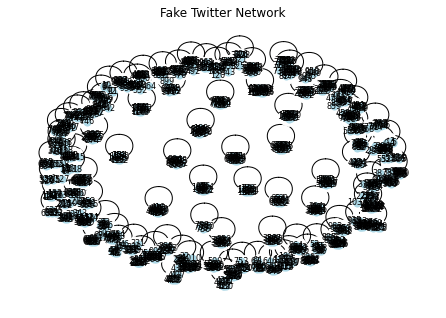

Number of nodes: 1050
Number of edges: 1050
Average degree: {7: 1.7142857142857142, 1: 12.368421052631579, 8: 1.75, 9: 1.7777777777777777, 10: 1.8, 11: 1.8181818181818181, 12: 1.8333333333333333, 13: 1.8461538461538463, 14: 1.8571428571428572, 15: 1.8666666666666667, 16: 1.875}


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create empty graph
G = nx.Graph()

# Function to add nodes with followers
def add_user(G, num_followers):
    user_id = len(G.nodes())
    G.add_node(user_id, name=f"User {user_id}")
    
    # Add self-loops to represent self-following
    G.add_edge(user_id, user_id)
    
    # Add followers
    for _ in range(num_followers):
        follower_id = len(G.nodes())
        G.add_node(follower_id, name=f"User {follower_id}")
        G.add_edge(user_id, follower_id)

# Generate graph with ~100 users and ~500 edges
for i in range(100):  
    add_user(G, 5 + (i % 10))  # Vary number of followers per user

# Set up edge attributes
for u, v in G.edges():
    G[u][v]['weight'] = 1

# Visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, node_color='lightblue', 
        with_labels=True, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Fake Twitter Network")
plt.axis('off')
plt.show()

# Print graph stats
print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
print(f"Average degree: {nx.average_degree_connectivity(G)}")
